In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

#input for any file name
file_name=input("Enter File Name: ")
journey="up"
file_path=os.path.join('week_data',journey, file_name)

if not os.path.isfile(file_path):
    print(f"Error: File '{file_name}' does not exist.")
else:
    df=pd.read_csv(file_path)

Enter File Name: 04-02-19.csv


In [8]:
name=input("Enter Schedule Name: ")
df=df[df['Schedule Name']==name]
cols=['Schedule Name','Adult','From Stage','To Stage','Trip Start Time','Trip End Time','Source','Destination']
df=df[cols]


source_stage=input("Enter Source: ")
destination_stage=input("Enter Destination: ")
df=df[(df['Source'] == source_stage) & (df['Destination']==destination_stage)]

df['Trip Start Time'] = pd.to_datetime(df['Trip Start Time'], format='%H:%M:%S')
df['Trip End Time'] = pd.to_datetime(df['Trip End Time'], format='%H:%M:%S')

start=input("Enter Start Time: ")
end=input("Enter End Time: ")

# Filter rows where trip starts b/w start time and end time
start_time = pd.to_datetime(start).time()
end_time = pd.to_datetime(end).time()
df = df[(df['Trip Start Time'].dt.time >= start_time) & (df['Trip Start Time'].dt.time <= end_time)]

Enter Schedule Name: 519-A1-AS-MDE
Enter Source: T.NAGAR
Enter Destination: THIRUPORUR
Enter Start Time: 08:30:00
Enter End Time: 10:46:00


In [9]:
#od matrix
bus_stages = [
    'T.NAGAR', 'SAIDAPET', 'ANNA UNIV', 'WPTC', 'SRP TOOLS',
    'KANDANCHAV', 'THORAIPAKKAM', 'M K CHAVADI', 'KARAPAKKAM',
    'SHOLINGANALLUR', 'KUMARAN NG', 'CHEMMANCHE', 'NAVALUR',
    'SIPCOT', 'CHURCH', 'PAL. CHEMI', 'HINDUSTAN', 'KELAMBAKKAM',
    'KOMAN NAGAR', 'ENGG', 'CHENGAMMAL', 'KALAVAKKAM','THIRUPORUR'
]

stage_mapping = {stage: i for i, stage in enumerate(bus_stages)}
df['From Stage'] = df['From Stage'].map(stage_mapping)
df['To Stage'] = df['To Stage'].map(stage_mapping)

df.dropna(subset=['From Stage', 'To Stage'], inplace=True)

od_matrix = pd.DataFrame(index=bus_stages, columns=bus_stages).fillna(0)

# Populate the matrix 
for index, row in df.iterrows():
    source = bus_stages[int(row['From Stage'])]
    destination = bus_stages[int(row['To Stage'])]
    adult_count = row['Adult']
    od_matrix.loc[source, destination] += adult_count


od_matrix['Boarding'] = od_matrix.sum(axis=1)

od_matrix['Alighting'] = od_matrix.sum(axis=0)
od_matrix['Sum']=od_matrix['Boarding']-od_matrix['Alighting']

In [10]:
arr=od_matrix['Sum'].values
passengers= np.cumsum(arr)

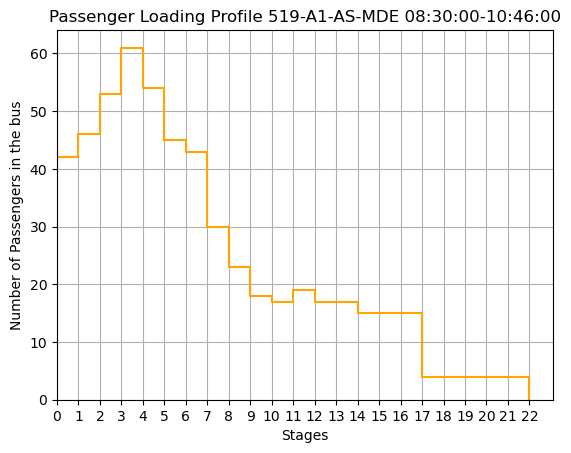

In [11]:
stages = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

plt.step(stages, passengers, where='post',color='orange')
plt.title(f"Passenger Loading Profile {name} {start}-{end}")
plt.xlabel('Stages')
plt.ylabel('Number of Passengers in the bus')
plt.xticks(stages)
plt.grid(True)

# x-axis and y-axis intersect at the origin
plt.xlim(left=0)  
plt.ylim(bottom=0)  

plt.show()